In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mlt
import datetime  as dt
import os
import pandas_profiling as pp
from  scipy import stats
from collections import defaultdict

In [3]:
def start():
    options = {
        'display': {
            'max_columns': None,
            'max_colwidth': 25,
            'expand_frame_repr': False,  # Don't wrap to multiple pages
            'max_rows': 30,
            'max_seq_items': 50,         # Max length of printed sequence
            'precision': 4,
            'show_dimensions': False
        },
        'mode': {
            'chained_assignment': None   # Controls SettingWithCopyWarning
        }
    }
    for category,option in options.items():
        for opt,value in option.items():
            pd.set_option(f'{category}.{opt}',value)
        
if __name__ == '__main__':
    start()
    del start

In [222]:
data_1  = pd.read_csv("C:/Users/kxj133/Downloads/Waterpump_indep_var.csv")
data_2  = pd.read_csv("C:/Users/kxj133/Downloads/Waterpump_dep_var.csv")

In [223]:
# Merging the target variable in the dataframe
data =  pd.merge(data_1,data_2,on = "id")

## Changing the target variable
status_group = data['status_group'].unique().tolist()
status_group
status_group.remove("functional needs repair")

"""Labelling the Functional and non- functional class as func_Non_func label to make the problem simple since 
our intention is to find the water pump which is functioning but requires repair """

data["status_group"] = data["status_group"].apply(lambda x : "func_Non_func" if x in status_group else x)

final_data = data.copy()

In [6]:
data['date_recorded'] = pd.to_datetime(data['date_recorded'])

### Description for the features in the dataset

1.  amount_tsh - Total static head (amount water available to waterpoint)
2.  date_recorded - The date the row was entered
3.  funder - Who funded the well
4.  gps_height - Altitude of the well
5.  installer - Organization that installed the well
6.  longitude - GPS coordinate
7.  latitude - GPS coordinate
8.  wpt_name - Name of the waterpoint if there is one
9.  num_private -
10. basin - Geographic water basin
11. subvillage - Geographic location
12. region - Geographic location
13. region_code - Geographic location (coded)
14. district_code - Geographic location (coded)
15. lga - Geographic location
16. ward - Geographic location
17. population - Population around the well
18. public_meeting - True/False
19. recorded_by - Group entering this row of data
20. scheme_management - Who operates the waterpoint
21. scheme_name - Who operates the waterpoint
22. permit - If the waterpoint is permitted
23. construction_year - Year the waterpoint was constructed
24. extraction_type - The kind of extraction the waterpoint uses
25. extraction_type_group - The kind of extraction the waterpoint uses
26. extraction_type_class - The kind of extraction the waterpoint uses
27. management - How the waterpoint is managed
28. management_group - How the waterpoint is managed
29. payment - What the water costs
30. payment_type - What the water costs
31. water_quality - The quality of the water
32. quality_group - The quality of the water
33. quantity - The quantity of water
34. quantity_group - The quantity of water
35. source - The source of the water
36. source_type - The source of the water
37. source_class - The source of the water
38. waterpoint_type - The kind of waterpoint
39. waterpoint_type_group - The kind of waterpoint
40. status_group - functional status of the pump

In [7]:
temp = data.nlargest(10000,'gps_height')

In [8]:
temp['status_group'].value_counts()

func_Non_func              9472
functional needs repair     528
Name: status_group, dtype: int64

In [9]:
data['status_group'].value_counts()

func_Non_func              55083
functional needs repair     4317
Name: status_group, dtype: int64

In [10]:
func_Non_func_prop = data[data['status_group'] == "func_Non_func"].shape[0]/data.shape[0]
functional_needs_repair_prop = 1- func_Non_func_prop
print(func_Non_func_prop)
print(functional_needs_repair_prop)

0.9273232323232323
0.07267676767676767


### Class proportion
        we have 92 percentange of func_Non_func_prop and 7 percentage of Functional_needs_repair_prop 

In [11]:
def get_catog(series):
    unique_count = series.nunique()
    length_count = len(series)
    if pd.api.types.is_int64_dtype(series):
        return 'numerical'
    elif pd.api.types.is_datetime64_dtype(series):
        return 'date'
    elif unique_count == length_count:
        return 'text(unique)'
    else :
        return 'catagorical'
def print_type(dataframe):
    for columnname in dataframe.columns:
        print(columnname + ":" + get_catog(dataframe[columnname]))

In [12]:
pp.ProfileReport(data)

Number of variables,41
Number of observations,59400
Total Missing (%),1.9%
Total size in memory,12.2 MiB
Average record size in memory,216.0 B
Numeric,10
Categorical,29
Boolean,0
Date,1
Text (Unique),0
Rejected,1


### EXPLORATORY DATA ANALYSIS 

In [13]:
list = ['amount_tsh', 'funder', 'gps_height',
 'installer', 'basin', 'subvillage', 'population', 'public_meeting',
 'scheme_management', 'scheme_name', 'permit', 'construction_year',
 'extraction_type', 'payment_type', 'water_quality',   
 'quantity_group', 'source_type', 'source_class', 'waterpoint_type',
 'status_group']

Eda_Data = pd.DataFrame(data[list],columns= list)


Eda_Data['region'] = data['region']

Eda_Data.head()

temp = Eda_Data[(Eda_Data['status_group'] == 'functional needs repair') & (Eda_Data['amount_tsh'] != 0)]

temp['amount_tsh'].min()

Eda_Data['basin'].nunique()

Eda_Data["status_group"] = Eda_Data["status_group"].apply(lambda x : "func_Non_func" if x in ['functional','non functional'] else x)

In [14]:
Eda_Data.head(2)

,amount_tsh,funder,gps_height,installer,basin,subvillage,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,payment_type,water_quality,quantity_group,source_type,source_class,waterpoint_type,status_group,region
0,6000.0,Roman,1390,Roman,Lake Nyasa,Mnyusi B,109,True,VWC,Roman,False,1999,gravity,annually,soft,enough,spring,groundwater,communal standpipe,func_Non_func,Iringa
1,0.0,Grumeti,1399,GRUMETI,Lake Victoria,Nyamara,280,NaN,Other,NaN,True,2010,gravity,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,func_Non_func,Mara


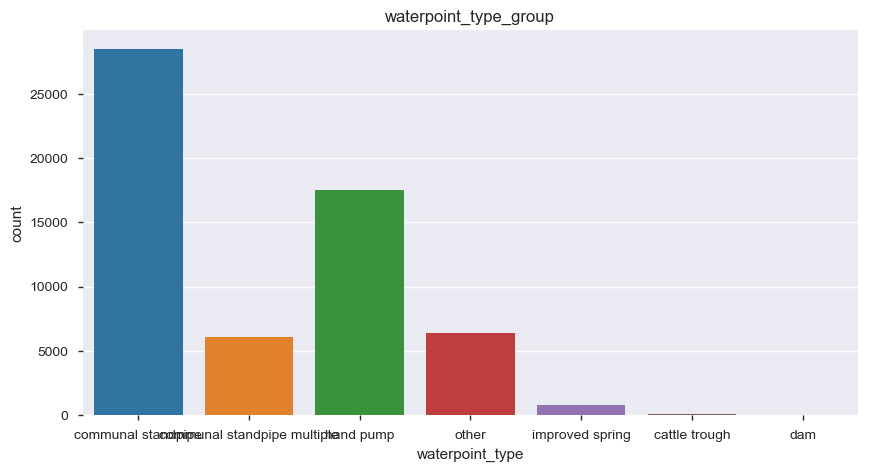

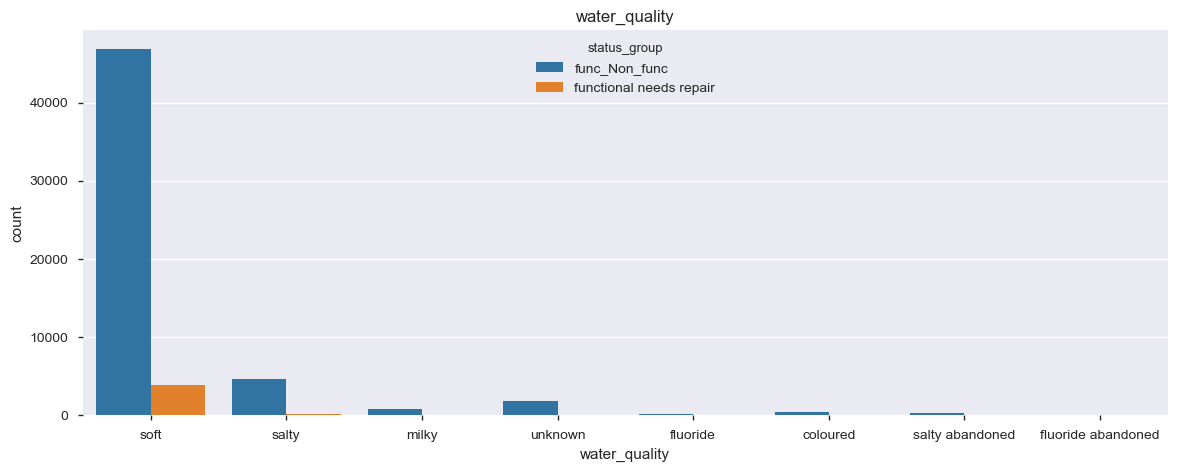

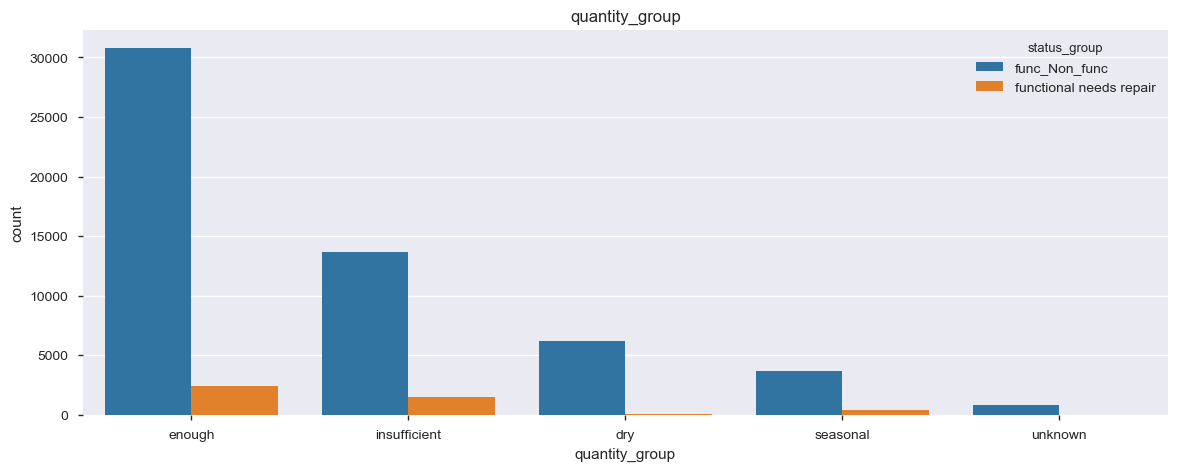

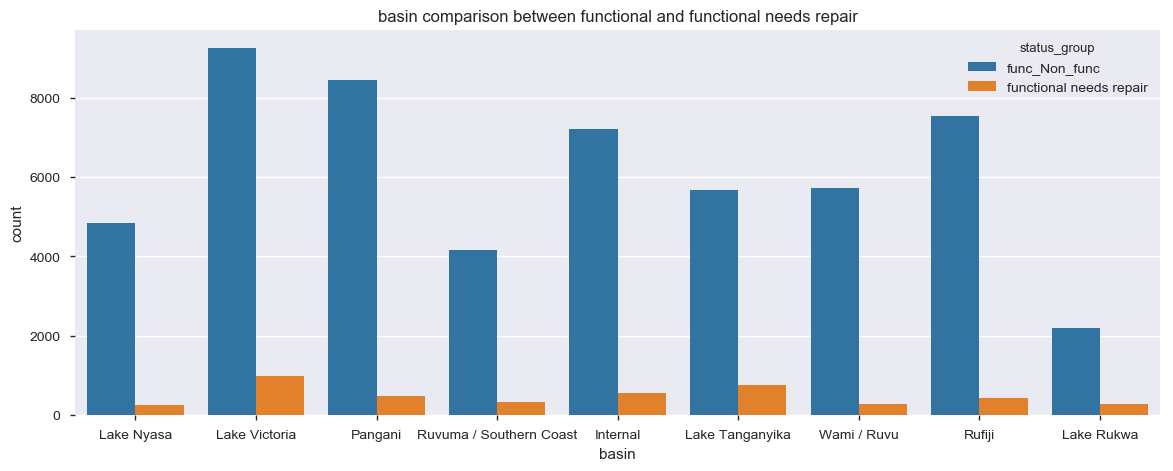

In [15]:
functional_needs_repair = Eda_Data[Eda_Data['status_group'] == 'functional needs repair']

temp = Eda_Data.groupby('waterpoint_type').agg({'status_group':"count"}).reset_index()

temp

### waterpoint_type_group
mlt.figure(figsize = (10,5))
plot1 = sns.countplot( x = 'waterpoint_type' , data =Eda_Data, dodge=False)
mlt.title('waterpoint_type_group')
mlt.savefig('C:/Users/kxj133/Downloads/plot1.png')

## water_quality plot
mlt.figure(figsize = (14,5))
plot2 = sns.countplot( x = 'water_quality' , data =Eda_Data, hue = "status_group")
mlt.title('water_quality')
mlt.savefig('C:/Users/kxj133/Downloads/plot2.png')

## quantity_group plot
mlt.figure(figsize = (14,5))
plot3 = sns.countplot( x = 'quantity_group' , data = Eda_Data, hue = "status_group")
mlt.title('quantity_group')
mlt.savefig('C:/Users/kxj133/Downloads/plot3.png')

## basin comparison between functional and functional needs repair
mlt.figure(figsize = (14,5))
plot4 = sns.countplot( x = 'basin' , data = Eda_Data, hue = "status_group")
mlt.title('basin comparison between functional and functional needs repair')
mlt.savefig('C:/Users/kxj133/Downloads/plot4.png')

In [16]:
list = []
i =0

for year in Eda_Data['construction_year']:
    if year  in range(1960,1970):
        list.append("1960-1969")
    elif year in range(1970,1980):
        list.append("1970-1979")
    elif year in range(1980,1990):
        list.append("1980-1989")
    elif year in range(1990,2000):
        list.append("1990-1999")
    elif year in range(2000,2014):
        list.append('2000-2013')
    elif year == 0:
        list.append("unknown")
        
Eda_Data['construction_decade'] = list


Eda_Data['construction_decade'].unique()


Eda_Data['construction_year'].min(),Eda_Data['construction_year'].max()

range(1960,1970)

temp = Eda_Data.groupby(["status_group","region"]).agg({'region':'count'}).sort_values(by = 'region')


Eda_Data.region.value_counts().iloc[:15].index

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: 'region' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version


Index(['Iringa', 'Shinyanga', 'Mbeya', 'Kilimanjaro', 'Morogoro', 'Arusha',
       'Kagera', 'Mwanza', 'Kigoma', 'Ruvuma', 'Pwani', 'Tanga', 'Dodoma',
       'Singida', 'Mara'],
      dtype='object')

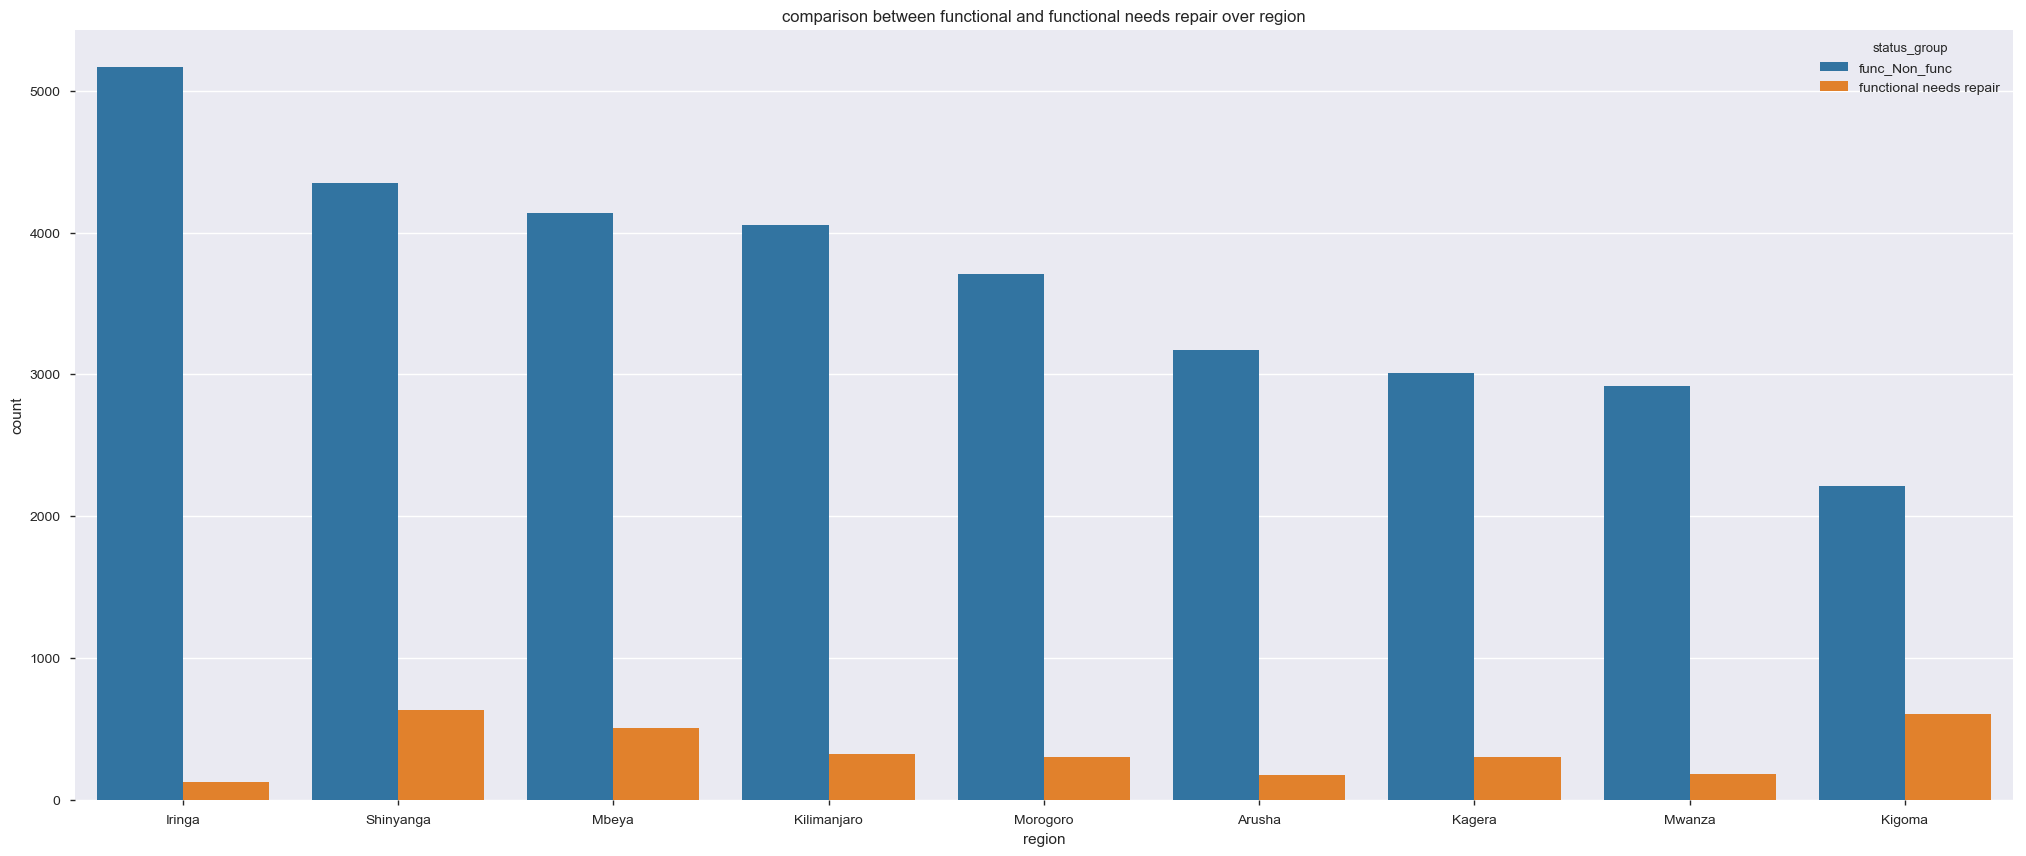

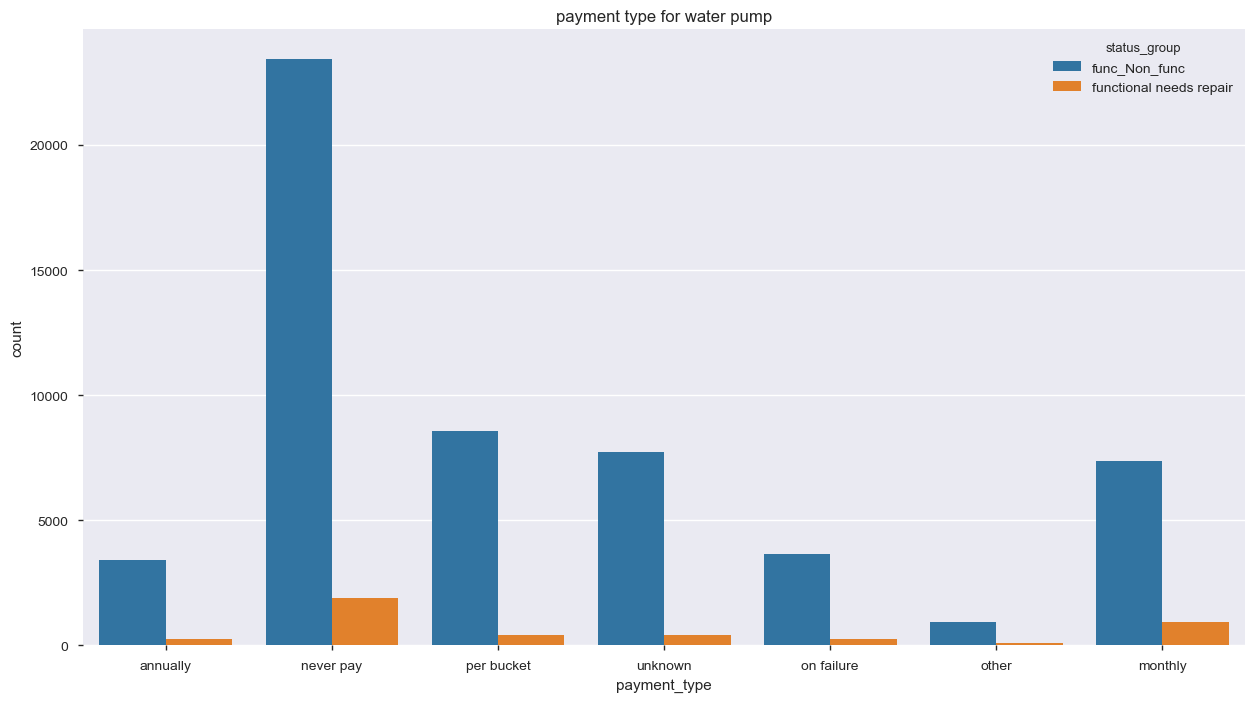

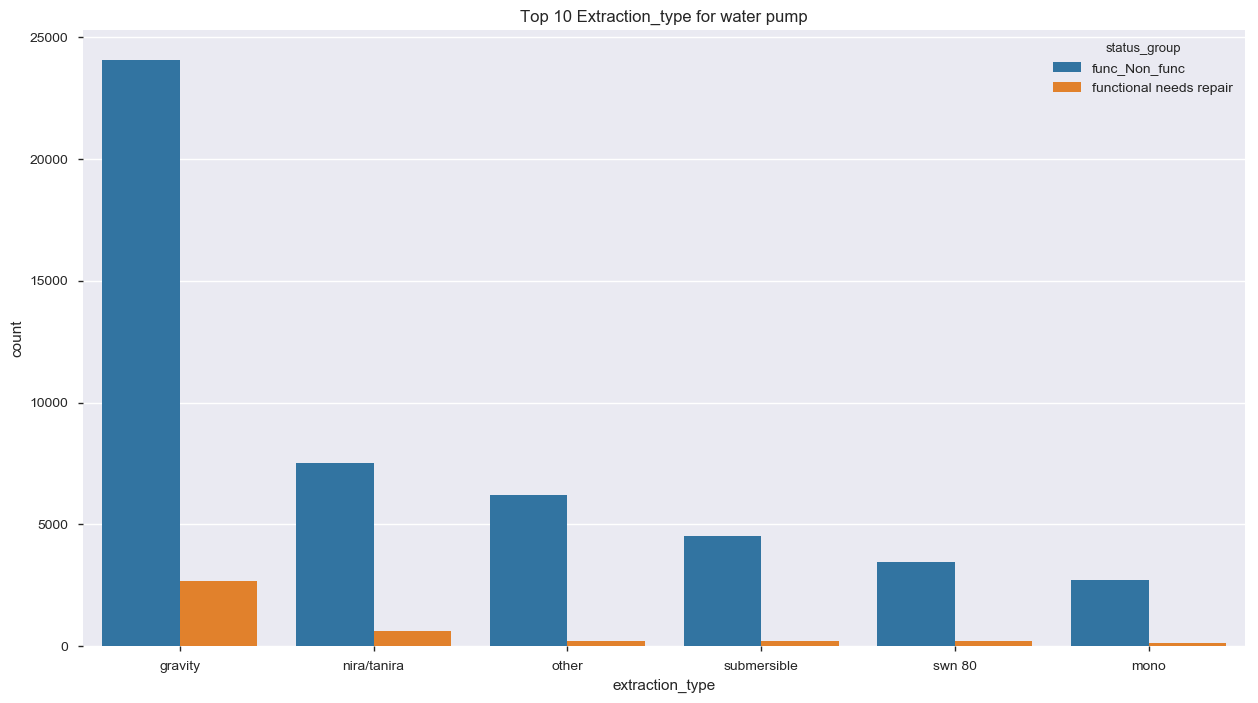

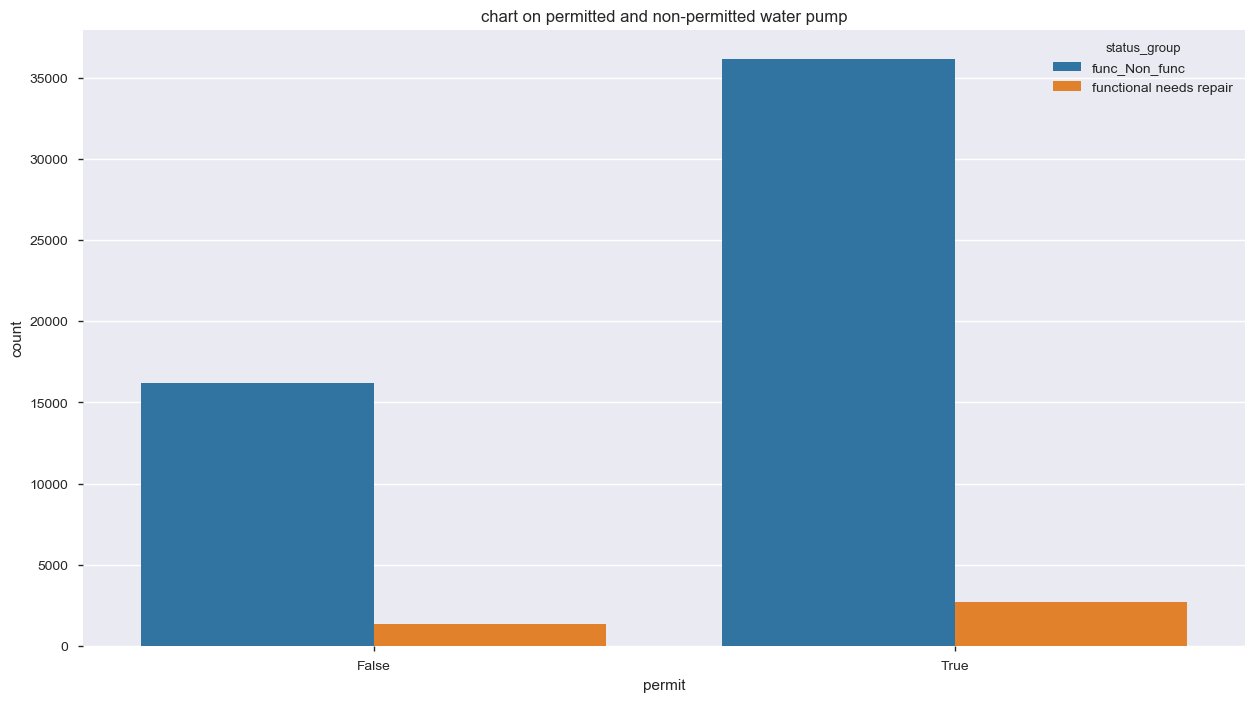

In [17]:

### comparison between functional and functional needs repair over region Chart
mlt.figure(figsize = (25,10))
plot4 = sns.countplot( x = 'region',data = Eda_Data, hue = "status_group",order=Eda_Data.region.value_counts().iloc[:9].index)
mlt.title('comparison between functional and functional needs repair over region')
mlt.savefig('C:/Users/kxj133/Downloads/plot4.png')

## payment type for water pump chart
mlt.figure(figsize = (15,8))
plot4 = sns.countplot( x= "payment_type",data = Eda_Data,hue = "status_group" )
mlt.title('payment type for water pump')
mlt.savefig('C:/Users/kxj133/Downloads/plot5.png')


Eda_Data['extraction_type'].value_counts()

### Top 10 Extraction_type for water pump
mlt.figure(figsize = (15,8))
plot4 = sns.countplot( x= "extraction_type",data = Eda_Data,hue = "status_group",order = Eda_Data["extraction_type"].value_counts().iloc[0:6].index)
mlt.title('Top 10 Extraction_type for water pump')
mlt.savefig('C:/Users/kxj133/Downloads/plot6.png')


Eda_Data['permit'].value_counts()

### chart on permitted and non-permitted water pump
mlt.figure(figsize = (15,8))
plot4 = sns.countplot( x= "permit",data = Eda_Data,hue = "status_group")
mlt.title('chart on permitted and non-permitted water pump')
mlt.savefig('C:/Users/kxj133/Downloads/plot7.png')

### Preparing the data for modelling 

In [96]:
data.shape

(29379, 24)

In [97]:
data.head(2)

,amount_tsh,basin,population,public_meeting,scheme_management,permit,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,waterpoint_type_group,status_group,wpt_label_x,wpt_label_y,installer,subvillage,region,lga,ward,scheme_name,installer_label,scheme_name_label
0,6000.0,Lake Nyasa,109,True,VWC,False,gravity,user-group,annually,good,enough,spring,communal standpipe,func_Non_func,wpt_none,wpt_none,Roman,Mnyusi B,Iringa,Ludewa,Mundindi,Roman,less_installer,large_scheme
1,400.0,Rufiji,1,True,VWC,True,other,user-group,annually,good,dry,borehole,other,func_Non_func,wpt_none,wpt_none,Roman,Myoruwa,Iringa,Ludewa,Mundindi,Roman,less_installer,large_scheme


In [101]:
###Choosing the one variable among three varaible since all has almost similiar information


pd.Index(data['extraction_type']).difference(pd.Index(data['extraction_type_group'])).values

pd.Index(data['extraction_type_group']).difference(pd.Index(data['extraction_type'])).values

pd.Index(data['extraction_type_class']).difference(pd.Index(data['extraction_type'])).values

print(data['extraction_type'].nunique(),data['extraction_type_group'].nunique(),data['extraction_type_class'].nunique())

data['extraction_type_class'].isnull().sum()

### Since Extraction_type_class variable has less class than other two variable , I am considering only
#extraction_type_class variable

data = data.drop(["extraction_type","extraction_type_group"],axis = 1)
data.shape

18 13 7


(59400, 39)

In [102]:
#Choosing the one variable between ["quantity","quantity_group"] since all has almost similiar information

data['quantity'].nunique(),data['quantity_group'].nunique() 

#Since both qunatity and quantity_group has same values removing one variable

data = data.drop(['quantity_group'],axis = 1)


In [103]:
###Choosing the one variable between ['water_quanlity',''quality_group] since all has almost similiar information

data['water_quality'].unique(),data['quality_group'].unique()

#Since quality group variable has less class, i have retained this varaible
data = data.drop(['water_quality'],axis =1)

In [104]:
### Choosing one variable among ["source","source_type","source_class"] since all varaible has almost similiar information

data['source'].nunique(),data['source_type'].nunique(),data['source_class'].nunique()

### Since source_type has no unknown value, i have retained "Source_type" Variable

data = data.drop(["source","source_class"],axis =1)

In [105]:
### choosing one variable between["payment","payment_type"] since all variable has almost similiar information

data['payment'].unique(),data['payment_type'].unique()

data = data.drop(['payment'],axis =1)

In [106]:
print(data[data['num_private'] == 0].shape[0]/data.shape[0])

##since 98 percent of observation has zero value, so it is useless variable

data = data.drop(['num_private'],axis =1)

0.9872558922558923


In [107]:
### Choosing one variable between ['management' , "management_group"]
data['management'].unique(),data['management_group'].unique()

### dropping management variable and retaining management_group variable
data = data.drop(['management'],axis = 1)

In [108]:
### Choosing one variable between['waterpoint_type',"waterpoint_type_group"]
data['waterpoint_type'].unique(),data['waterpoint_type_group'].unique()

### dropping "waterpoint_type_group" variable

data = data.drop(['waterpoint_type'],axis =1)

In [109]:
## Since the recoreded_by varaible has only one class, it has no information. so, i dropped it
data = data.drop(['recorded_by'],axis =1)

In [110]:
### Since we have region varaible and subvillage varaible.so,i dropped longitude and latitude varaible

data = data.drop(['longitude','latitude'],axis = 1)

In [111]:
### Since in Installer variable the string are mixed with lower and upper string converted everything into lower string
data['funder'] = data['funder'].str.lower()
data['installer'] = data['installer'].str.lower()

## Retaining installer varaible 

print(data['funder'].nunique(),data['installer'].nunique())
len(pd.Index(data['funder']).difference(pd.Index(data['installer'])).values.tolist()),len(pd.Index(data['installer']).difference(pd.Index(data['funder'])).values.tolist())

data = data.drop(['funder'],axis = 1)



1897 1935


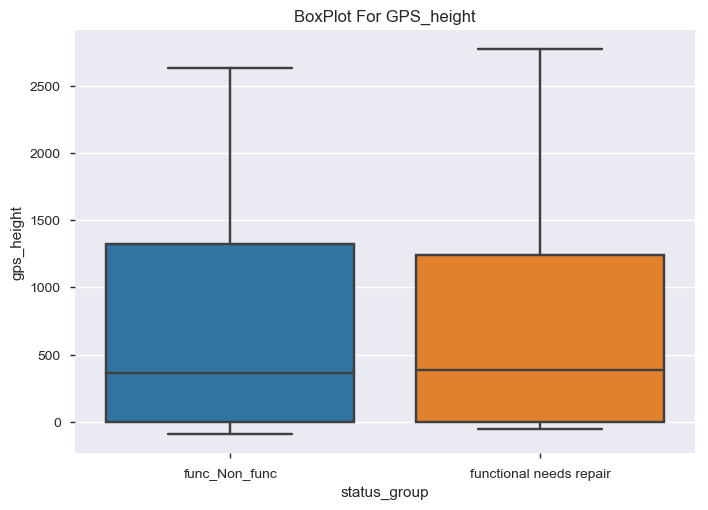

In [114]:
### since the gps_height is having almost simiar distribution for both class in status group,
##this variable will not be helpful for us to classify.so, i dropped this variable

### Lets inspect gps_height 
boxplot_gps_height =sns.boxplot(x = 'status_group', y = 'gps_height',data = data)
mlt.title("BoxPlot For GPS_height")

##data = data.drop(['gps_height'], axis =1)
mlt.savefig("C:/Users/kxj133/Downloads/boxplot_gps_height.png")

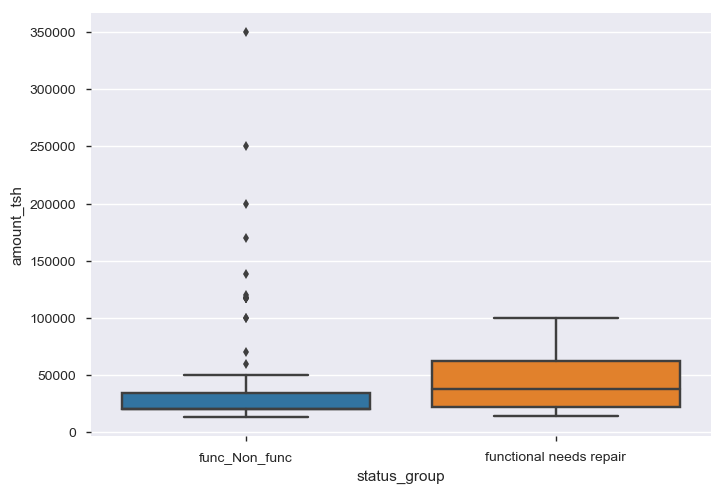

In [115]:
data[data['amount_tsh'] == 0].shape[0]/data.shape[0] ## 70 % of Zero values

## Lets inspect this variable by plotting boxplot
temp = data[data['amount_tsh'] > 12000]
sns.boxplot(x = 'status_group', y = 'amount_tsh', data = temp)

##Since the the distribution of amount_tsh varaible is different for two different class of status group,i retained this variable

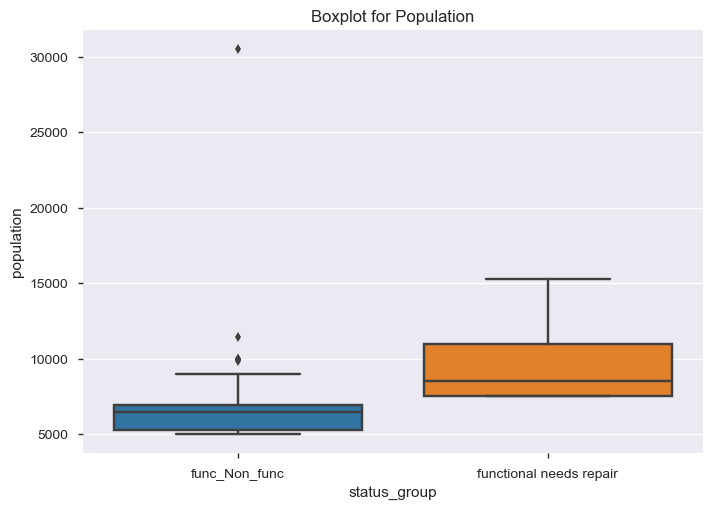

In [116]:
temp = data[data['population'] >= 5000]
boxplot_population = sns.boxplot(x = 'status_group', y = 'population',data = temp) 
### since the distribution of population between status group is different. so, it will be helful to classify.
mlt.title("Boxplot for Population")
mlt.savefig("C:/Users/kxj133/Downloads/boxplot_population.png")

In [117]:
data['basin'].unique(),data['basin'].isnull().sum()

(array(['Lake Nyasa', 'Lake Victoria', 'Pangani',
        'Ruvuma / Southern Coast', 'Internal', 'Lake Tanganyika',
        'Wami / Ruvu', 'Rufiji', 'Lake Rukwa'], dtype=object), 0)

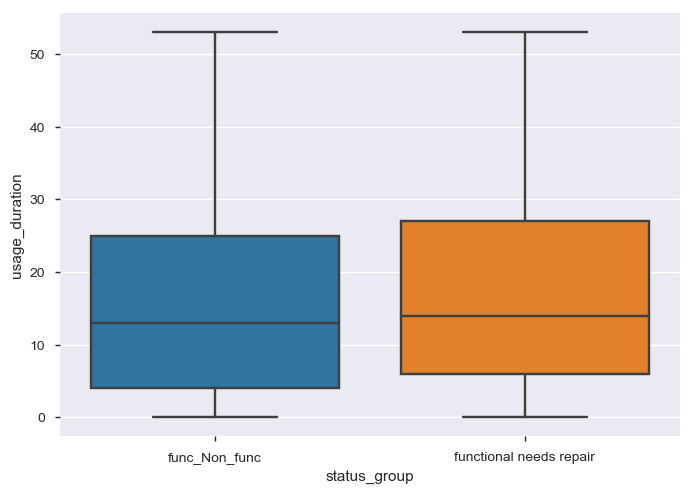

In [118]:
data['usage_duration'] = pd.to_datetime(data['date_recorded']).dt.year - data['construction_year']

temp = data[(data['construction_year'] != 0) & (data['construction_year'] <= pd.to_datetime(data['date_recorded']).dt.year )]
temp.shape,data.shape

temp_1 = data[(data['construction_year'] != 0)]
temp_1.shape

box_plot_lifespan = sns.boxplot(y ="usage_duration", x = "status_group",data = temp)

### since the usage duration is also having the same disribution for both classes, I dropped the usage duration varaible,construction_year,recoreded_date
data = data.drop(['usage_duration','construction_year','date_recorded'],axis = 1)

mlt.savefig("C:/Users/kxj133/Downloads/boxplot_lifespan.png")

In [119]:
### Since we have region name i removed the region_code and district code
data = data.drop(['region_code','district_code'],axis =1)

In [120]:


data['wpt_name'].value_counts()

dic = defaultdict(list)

temp = pd.DataFrame(data.groupby("wpt_name")['wpt_name'].count().sort_values(ascending  = False),index= None,columns = ['wpt_name'])
temp['wpt_name'].items()
for i,j in temp['wpt_name'].items():
    #print(i)
    #print(j)
    if i== "none":
        dic['wpt_name'].append(i)
        dic['wpt_label'].append("wpt_none")
    elif j>=5 and i!= "none":
        dic['wpt_name'].append(i)
        dic['wpt_label'].append("wpt_high")
    elif j<5 and i!= "none" :
        dic['wpt_name'].append(i)
        dic['wpt_label'].append("wpt_less")


df = pd.DataFrame(dic)

### Since we have around 37400 unique values we can't create dummy variables for all those classes so i grouped it into three groups based on the value counts
## Those class which has more than 5 class are labelled as wpt_high and less than 5 as wpt_less and other as wpt_none
#data['wpt_code'] = df['values']

data = pd.merge(data,df,on = "wpt_name")


In [121]:
### Since we have Wpt_label i removed Wpt_name variable
data = data.drop(["wpt_name"],axis =1)

In [122]:
data.head(2)

,id,amount_tsh,gps_height,installer,basin,subvillage,region,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,waterpoint_type_group,status_group,wpt_label
0,69572,6000.0,1390,roman,Lake Nyasa,Mnyusi B,Iringa,Ludewa,Mundindi,109,True,VWC,Roman,False,gravity,user-group,annually,good,enough,spring,communal standpipe,func_Non_func,wpt_none
1,18274,500.0,1763,danid,Lake Nyasa,Manyanya,Iringa,Ludewa,Mawengi,1,True,VWC,Makanj,True,gravity,user-group,annually,good,enough,spring,communal standpipe,func_Non_func,wpt_none


In [123]:
cat = ['installer',"subvillage","region","lga","ward","scheme_name"]

In [124]:
data= data.drop(['installer',"subvillage","region","lga","ward","scheme_name"],axis = 1)
data = data.drop(['id'],axis =1)

In [125]:
data.head(2)

,amount_tsh,gps_height,basin,population,public_meeting,scheme_management,permit,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,waterpoint_type_group,status_group,wpt_label
0,6000.0,1390,Lake Nyasa,109,True,VWC,False,gravity,user-group,annually,good,enough,spring,communal standpipe,func_Non_func,wpt_none
1,500.0,1763,Lake Nyasa,1,True,VWC,True,gravity,user-group,annually,good,enough,spring,communal standpipe,func_Non_func,wpt_none


In [126]:
X = data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,14]]
Y = data['status_group']

In [127]:
X = pd.get_dummies(X)

In [128]:
temp.head(2)

,wpt_name
wpt_name,
none,3563
Shuleni,1748


In [129]:
temp.shape

(37400, 1)

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight= {"functional needs repair" : 0.9,"func_Non_func" : 0.1})
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size = 0.30)
model.fit(train_x,train_y)


RandomForestClassifier(bootstrap=True,
            class_weight={'functional needs repair': 0.9, 'func_Non_func': 0.1},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [131]:
features = pd.DataFrame(model.feature_importances_,X.columns,columns= ['values']).sort_values(by = "values",ascending = False).head(15)

In [132]:
features

,values
status_group_func_Non_func,0.7608
status_group_functional needs repair,0.1985
extraction_type_class_gravity,0.0111
basin_Lake Tanganyika,0.0033
gps_height,0.0020
payment_type_per bucket,0.0017
extraction_type_class_other,0.0015
source_type_borehole,0.0014
amount_tsh,0.0014
basin_Lake Victoria,0.0014


In [133]:
Imp_features = features.index.tolist()

In [134]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

In [163]:
accuracy_score(test_y,model.predict(test_x))

0.9077603812117087

In [164]:
confusion_matrix(test_y,model.predict(test_x))

array([[7866,  277],
       [ 536,  135]], dtype=int64)

In [165]:
print(classification_report(test_y,model.predict(test_x)))

                         precision    recall  f1-score   support

          func_Non_func       0.94      0.97      0.95      8143
functional needs repair       0.33      0.20      0.25       671

            avg / total       0.89      0.91      0.90      8814



In [137]:
f1_score(test_y,model.predict(test_x),pos_label="functional needs repair")

1.0

In [158]:
from sklearn.ensemble import ExtraTreesClassifier
model_1 = ExtraTreesClassifier(class_weight= {"functional needs repair" : 0.92,"func_Non_func" : 0.08})
model_1.fit(train_x,train_y)
accuracy_score(test_y,model_1.predict(test_x))


0.8960744270478784

In [159]:

features_1 = pd.DataFrame(model_1.feature_importances_,X.columns,columns= ['values']).sort_values(by = "values",ascending = False).head(15)

In [160]:
f1_score(test_y,model_1.predict(test_x),pos_label="functional needs repair")

0.2479474548440066

In [161]:
print(classification_report(test_y,model_1.predict(test_x)))

                         precision    recall  f1-score   support

          func_Non_func       0.95      0.94      0.94      8243
functional needs repair       0.23      0.26      0.25       571

            avg / total       0.90      0.90      0.90      8814



In [142]:
variables = ['installer',"subvillage","region","lga","ward","scheme_name"]
data[variables] = final_data[variables]

In [143]:
data.head(2)

,amount_tsh,gps_height,basin,population,public_meeting,scheme_management,permit,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,waterpoint_type_group,status_group,wpt_label,installer,subvillage,region,lga,ward,scheme_name
0,6000.0,1390,Lake Nyasa,109,True,VWC,False,gravity,user-group,annually,good,enough,spring,communal standpipe,func_Non_func,wpt_none,Roman,Mnyusi B,Iringa,Ludewa,Mundindi,Roman
1,500.0,1763,Lake Nyasa,1,True,VWC,True,gravity,user-group,annually,good,enough,spring,communal standpipe,func_Non_func,wpt_none,GRUMETI,Nyamara,Mara,Serengeti,Natta,NaN


In [144]:
### Labelling the more catagorical value varaible
data['installer'].value_counts()

dic_1 = defaultdict(list)

temp = pd.DataFrame(data.groupby("installer")['installer'].count().sort_values(ascending  = False),index= None,columns = ['installer'])
temp['installer'].items()
for i,j in temp['installer'].items():
    #print(i)
    #print(j)
    if j < 50:
        dic_1['installer'].append(i)
        dic_1['installer_label'].append("very_less_installer")
    elif (j >= 50) & (j < 300) :
        dic_1['installer'].append(i)
        dic_1['installer_label'].append("less_installer")
    elif (j>= 300) & (j < 600):
        dic_1['installer'].append(i)
        dic_1['installer_label'].append("high_installer")      
    elif j>=600:
        dic_1['installer'].append(i)
        dic_1['installer_label'].append("very_high_installer")

df_1 = pd.DataFrame(dic_1)

In [145]:
data = pd.merge(data,df_1,on = "installer")
data.head(2)

,amount_tsh,gps_height,basin,population,public_meeting,scheme_management,permit,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,waterpoint_type_group,status_group,wpt_label,installer,subvillage,region,lga,ward,scheme_name,installer_label
0,6000.0,1390,Lake Nyasa,109,True,VWC,False,gravity,user-group,annually,good,enough,spring,communal standpipe,func_Non_func,wpt_none,Roman,Mnyusi B,Iringa,Ludewa,Mundindi,Roman,less_installer
1,0.0,0,Wami / Ruvu,0,True,VWC,True,motorpump,user-group,never pay,salty,dry,borehole,communal standpipe,func_Non_func,wpt_none,Roman,Dongo,Morogoro,Morogoro Rural,Tawa,Tawa,less_installer


In [146]:
### Labelling the more catagorical value varaible


dic_2 = defaultdict(list)

temp = pd.DataFrame(data.groupby("scheme_name")['scheme_name'].count().sort_values(ascending  = False),index= None,columns = ['scheme_name'])
temp['scheme_name'].items()
for i,j in temp['scheme_name'].items():
    #print(i)
    #print(j)
    if i ==  "None":
        dic_2['scheme_name'].append(i)
        dic_2['scheme_name_label'].append("No_scheme")
    elif j <50 :
        dic_2['scheme_name'].append(i)
        dic_2['scheme_name_label'].append("small_scheme")
    elif (j >= 50) & (j < 100) :
        dic_2['scheme_name'].append(i)
        dic_2['scheme_name_label'].append("medium_scheme")   
    elif j>=100:
        dic_2['scheme_name'].append(i)
        dic_2['scheme_name_label'].append("large_scheme")

df_2 = pd.DataFrame(dic_2)

In [147]:
data = pd.merge(data,df_2,on="scheme_name")
data.head(2)

,amount_tsh,gps_height,basin,population,public_meeting,scheme_management,permit,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,waterpoint_type_group,status_group,wpt_label,installer,subvillage,region,lga,ward,scheme_name,installer_label,scheme_name_label
0,6000.0,1390,Lake Nyasa,109,True,VWC,False,gravity,user-group,annually,good,enough,spring,communal standpipe,func_Non_func,wpt_none,Roman,Mnyusi B,Iringa,Ludewa,Mundindi,Roman,less_installer,large_scheme
1,400.0,1496,Rufiji,1,True,VWC,True,other,user-group,annually,good,dry,borehole,other,func_Non_func,wpt_none,Roman,Myoruwa,Iringa,Ludewa,Mundindi,Roman,less_installer,large_scheme


In [148]:
variables = ['installer',"subvillage","region","lga","ward","scheme_name"]

In [149]:
model_data = data.drop(variables,axis =1)

In [150]:
model_data.head(2)

,amount_tsh,gps_height,basin,population,public_meeting,scheme_management,permit,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,waterpoint_type_group,status_group,wpt_label,installer_label,scheme_name_label
0,6000.0,1390,Lake Nyasa,109,True,VWC,False,gravity,user-group,annually,good,enough,spring,communal standpipe,func_Non_func,wpt_none,less_installer,large_scheme
1,400.0,1496,Rufiji,1,True,VWC,True,other,user-group,annually,good,dry,borehole,other,func_Non_func,wpt_none,less_installer,large_scheme


In [196]:
X = model_data.drop(['status_group'],axis =1)
Y = model_data['status_group']

X = pd.get_dummies(X)

new_model_1 = RandomForestClassifier()
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size =0.3,random_state = 100)
new_model_1.fit(train_x,train_y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [197]:
X.shape

(29379, 81)

In [253]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB

In [250]:
gaussian_model = GaussianNB()
gaussian_model.fit(train_x,train_y)
print(classification_report(test_y,gaussian_model.predict(test_x)))

                         precision    recall  f1-score   support

          func_Non_func       0.97      0.57      0.72      8243
functional needs repair       0.11      0.74      0.18       571

            avg / total       0.91      0.58      0.68      8814



In [185]:
gaussian_model.class_prior_

array([0.92954048, 0.07045952])

In [175]:
confusion_matrix(test_y,gaussian_model.predict(test_x))

array([[4952, 3191],
       [ 180,  491]], dtype=int64)

In [224]:
new_data = copy.deepcopy(model_data)
new_data['usage_duration'] = pd.to_datetime(data['date_recorded']).dt.year - data['construction_year']

In [226]:
X = new_data.drop(['status_group'],axis =1)
Y = new_data['status_group']

X = pd.get_dummies(X)

In [230]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size =0.3,random_state = 100)